In [14]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

In [15]:
file_path = '/content/Online retail.xlsx'
df =pd.read_excel('/content/Online retail.xlsx')
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [16]:
transactions = df[df.columns[0]].dropna().apply(lambda x: x.split(','))


unique_items = sorted(list(set(item for transaction in transactions for item in transaction)))
print(unique_items)

[' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons', 'milk', 'mineral wa

In [17]:
one_hot_encoded_df = pd.DataFrame(0, index=range(len(transactions)), columns=unique_items)

for i, transaction in enumerate(transactions):
    for item in transaction:
        one_hot_encoded_df.at[i, item.strip()] = 1

# Apply the Apriori algorithm
min_support = 0.01  # Minimum support threshold
frequent_itemsets = apriori(one_hot_encoded_df, min_support=min_support, use_colnames=True)

print(frequent_itemsets)

      support                                 itemsets
0    0.020267                                (almonds)
1    0.033200                                (avocado)
2    0.010800                         (barbecue sauce)
3    0.014267                              (black tea)
4    0.011467                             (body spray)
..        ...                                      ...
254  0.011067       (ground beef, milk, mineral water)
255  0.017067  (ground beef, spaghetti, mineral water)
256  0.015733         (milk, spaghetti, mineral water)
257  0.010267    (spaghetti, olive oil, mineral water)
258  0.011467     (pancakes, spaghetti, mineral water)

[259 rows x 2 columns]


In [18]:
min_confidence = 0.2  # Minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
print(rules)

                    antecedents      consequents  antecedent support  \
0                     (avocado)  (mineral water)            0.033200   
1                     (burgers)           (eggs)            0.087200   
2                     (burgers)   (french fries)            0.087200   
3                     (burgers)      (green tea)            0.087200   
4                     (burgers)           (milk)            0.087200   
..                          ...              ...                 ...   
157  (spaghetti, mineral water)           (milk)            0.059733   
158      (spaghetti, olive oil)  (mineral water)            0.022933   
159  (olive oil, mineral water)      (spaghetti)            0.027467   
160       (pancakes, spaghetti)  (mineral water)            0.025200   
161   (pancakes, mineral water)      (spaghetti)            0.033733   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.238267  0.011467    0.345382  1.44955

In [19]:
rules = rules.sort_values('lift', ascending=False)
print(rules)

                    antecedents          consequents  antecedent support  \
75              (herb & pepper)        (ground beef)            0.049467   
154  (spaghetti, mineral water)        (ground beef)            0.059733   
69                   (tomatoes)  (frozen vegetables)            0.068400   
67                     (shrimp)  (frozen vegetables)            0.071333   
144       (milk, mineral water)  (frozen vegetables)            0.048000   
..                          ...                  ...                 ...   
74                  (green tea)          (spaghetti)            0.132000   
46                (ground beef)               (eggs)            0.098267   
19                  (chocolate)               (eggs)            0.163867   
73                  (green tea)      (mineral water)            0.132000   
57                   (escalope)      (mineral water)            0.079333   

     consequent support   support  confidence      lift  leverage  conviction  \
75    

In [20]:
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules)

# Analyze the top 10 rules (you can adjust the number)
top_rules = rules.head(10)
print("\nTop 10 Association Rules:\n", top_rules)


Frequent Itemsets:
       support                                 itemsets
0    0.020267                                (almonds)
1    0.033200                                (avocado)
2    0.010800                         (barbecue sauce)
3    0.014267                              (black tea)
4    0.011467                             (body spray)
..        ...                                      ...
254  0.011067       (ground beef, milk, mineral water)
255  0.017067  (ground beef, spaghetti, mineral water)
256  0.015733         (milk, spaghetti, mineral water)
257  0.010267    (spaghetti, olive oil, mineral water)
258  0.011467     (pancakes, spaghetti, mineral water)

[259 rows x 2 columns]

Association Rules:
                     antecedents          consequents  antecedent support  \
75              (herb & pepper)        (ground beef)            0.049467   
154  (spaghetti, mineral water)        (ground beef)            0.059733   
69                   (tomatoes)  (frozen vegeta

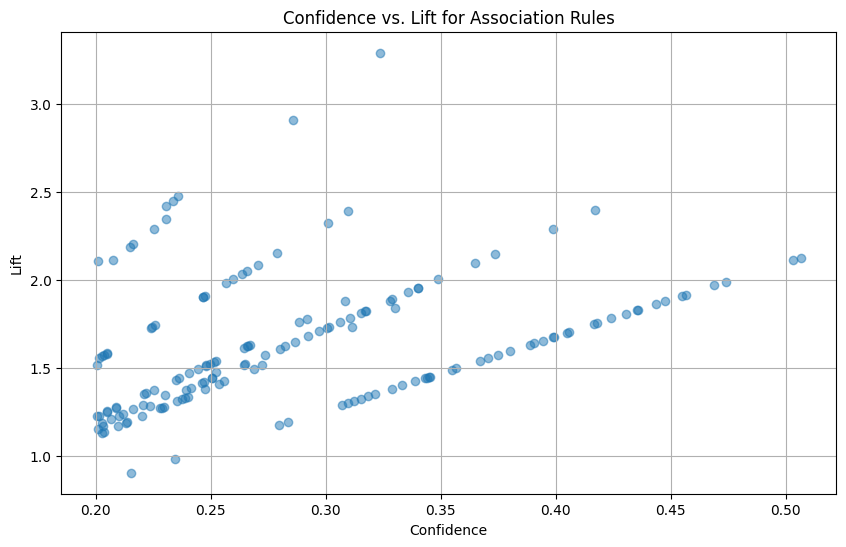

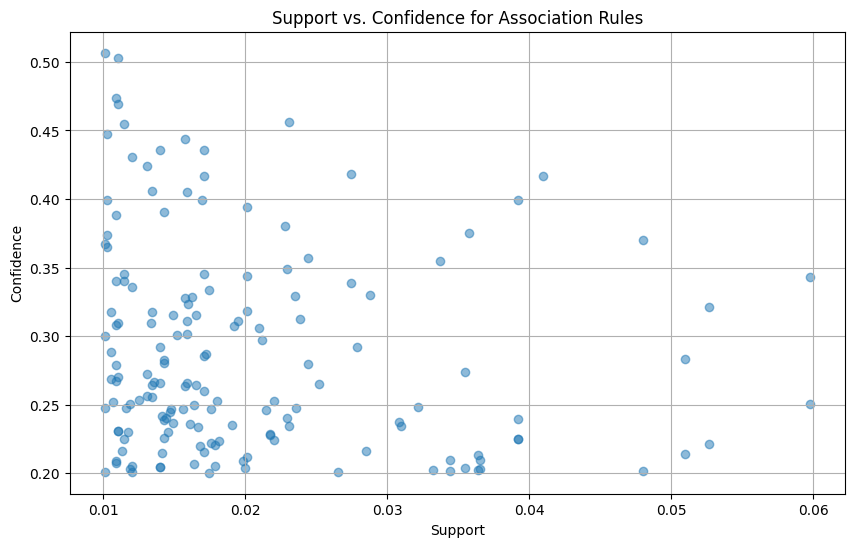

In [21]:
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules
# You can adjust the plot based on what you want to visualize

# Example: Plotting confidence vs. lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift for Association Rules')
plt.grid(True)
plt.show()

# Example: Plotting support vs. confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.grid(True)
plt.show()


##interview questions
1.what is lift and why is it important in Association rules?
Lift is a measure of the strength of an association between two items, comparing the observed co-occurrence of two items with their expected co-occurrence if they were independent.


​importance: Lift is important because it helps filter out random co-occurrences. It identifies strong relationships that are not just a result of high support but actually reflect interesting purchasing patterns.



2.​ What is support and confidence? How do you calculate them?
Support: Measures how frequently an item or itemset appears in the dataset.
Confidence: Measures how often the rule X → Y is true (i.e., how often Y appears in transactions that contain X).

Support is useful for identifying frequent items or itemsets, while confidence assesses the reliability of the association between items


3. What are some limitations or challenges of Association rule mining?

*Scalability
*Sparsity
*Choosing thresholds
*Overfitting
*Interpretability

